# Introduction
Urban Rivers is a conservation organization helping to restore the Chicago River.  

Part of the project involves tracking changes in biodiversity attributable to the installation of floating wetlands.  
Volunteers have placed and maintain motion detection cameras (camera traps) along installations, natural river banks, and the existing metal retaining walls on the water way.

These pictures are available on s3 - this code investigates downloading a portion of those images for testing with SpeciesNet.

This workbook was used for detections a local CPU

In [ ]:
# If running notebook online on kaggle
%pip install -Uqq fastbook dotenv speciesnet megadetector-utils

In [ ]:
# Import the fastai notebook library
import fastbook
fastbook.setup_book()

In [ ]:
# Preview 4 images from the publicURL column using fastbook
from fastbook import *
from fastai.vision.widgets import *

# Create a directory to save the images
path = Path('images')
path.mkdir(exist_ok=True)

# Download and display a subset of 10 images for testing - found rat at 44410:44420
urls = df['publicURL'][44410:44560]
for i, url in enumerate(urls):
    # Download the image
    dest = path/f'image_{i}.jpg'
    # Since we're going to resize the image, we can download a smaller version in AWS and avoid overhead
    download_url(f'{url}?width=480&height=480', dest, show_progress=False)

In [1]:
from IPython.display import display
from IPython.display import JSON

from speciesnet import DEFAULT_MODEL
from speciesnet import draw_bboxes
from speciesnet import load_rgb_image
from speciesnet import SpeciesNet
from speciesnet import SUPPORTED_MODELS

In [2]:
def print_predictions(predictions_dict: dict) -> None:
    print("Predictions:")
    for prediction in predictions_dict["predictions"]:
        print(prediction["filepath"], "=>", prediction["prediction"])

In [3]:
print("Default SpeciesNet model:", DEFAULT_MODEL)
print("Supported SpeciesNet models:", SUPPORTED_MODELS)

Default SpeciesNet model: kaggle:google/speciesnet/pyTorch/v4.0.1a
Supported SpeciesNet models: ['kaggle:google/speciesnet/pyTorch/v4.0.1a', 'kaggle:google/speciesnet/pyTorch/v4.0.1b']


In [ ]:
# Pick the model we want to use (4.0.1b)
# model = SpeciesNet("kaggle:google/speciesnet/pyTorch/v4.0.1b")
default_model = SpeciesNet(DEFAULT_MODEL)

In [5]:
# Display the paths for images in the images folder using os as a list comprehension
import os
image_paths = [os.path.join("images", f) for f in os.listdir("images") if f.endswith(".jpg")]

instances = []
for image_path in image_paths:
    instances.append({
        "filepath": image_path,
        "latitude": 41.906782,
        "longitude": -87.651927
    })

print(instances)

[{'filepath': 'images\\image_0.jpg', 'latitude': 41.906782, 'longitude': -87.651927}, {'filepath': 'images\\image_1.jpg', 'latitude': 41.906782, 'longitude': -87.651927}, {'filepath': 'images\\image_10.jpg', 'latitude': 41.906782, 'longitude': -87.651927}, {'filepath': 'images\\image_11.jpg', 'latitude': 41.906782, 'longitude': -87.651927}, {'filepath': 'images\\image_12.jpg', 'latitude': 41.906782, 'longitude': -87.651927}, {'filepath': 'images\\image_13.jpg', 'latitude': 41.906782, 'longitude': -87.651927}, {'filepath': 'images\\image_14.jpg', 'latitude': 41.906782, 'longitude': -87.651927}, {'filepath': 'images\\image_15.jpg', 'latitude': 41.906782, 'longitude': -87.651927}, {'filepath': 'images\\image_16.jpg', 'latitude': 41.906782, 'longitude': -87.651927}, {'filepath': 'images\\image_17.jpg', 'latitude': 41.906782, 'longitude': -87.651927}, {'filepath': 'images\\image_18.jpg', 'latitude': 41.906782, 'longitude': -87.651927}, {'filepath': 'images\\image_19.jpg', 'latitude': 41.906

In [6]:
# Run speciesnet on the folder of images
# predictions_dict = model.predict(folders=["images"], country="USA")


default_predictions_dict = default_model.predict(
    instances_dict={
        "instances": instances
    }
)

# Display the predictions
print_predictions(default_predictions_dict)
display(JSON(default_predictions_dict))

Predictions:
images\image_0.jpg => 990ae9dd-7a59-4344-afcb-1b7b21368000;mammalia;primates;hominidae;homo;sapiens;human
images\image_1.jpg => f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank
images\image_10.jpg => 990ae9dd-7a59-4344-afcb-1b7b21368000;mammalia;primates;hominidae;homo;sapiens;human
images\image_11.jpg => 990ae9dd-7a59-4344-afcb-1b7b21368000;mammalia;primates;hominidae;homo;sapiens;human
images\image_12.jpg => 990ae9dd-7a59-4344-afcb-1b7b21368000;mammalia;primates;hominidae;homo;sapiens;human
images\image_13.jpg => 990ae9dd-7a59-4344-afcb-1b7b21368000;mammalia;primates;hominidae;homo;sapiens;human
images\image_14.jpg => 990ae9dd-7a59-4344-afcb-1b7b21368000;mammalia;primates;hominidae;homo;sapiens;human
images\image_15.jpg => f2d233e3-80e3-433d-9687-e29ecc7a467a;mammalia;;;;;mammal
images\image_16.jpg => 990ae9dd-7a59-4344-afcb-1b7b21368000;mammalia;primates;hominidae;homo;sapiens;human
images\image_17.jpg => f2efdae9-efb8-48fb-8a91-eccf79ab4ffb;no cv result;no cv result;no 

<IPython.core.display.JSON object>

In [7]:
# Save the predictions dict to a json file
import json

with open("images/default_predictions.json", "w") as f:
    json.dump(default_predictions_dict, f, indent=2)

# with open("full_predictions.json", "w") as f:
#     json.dump(predictions_dict, f, indent=2)

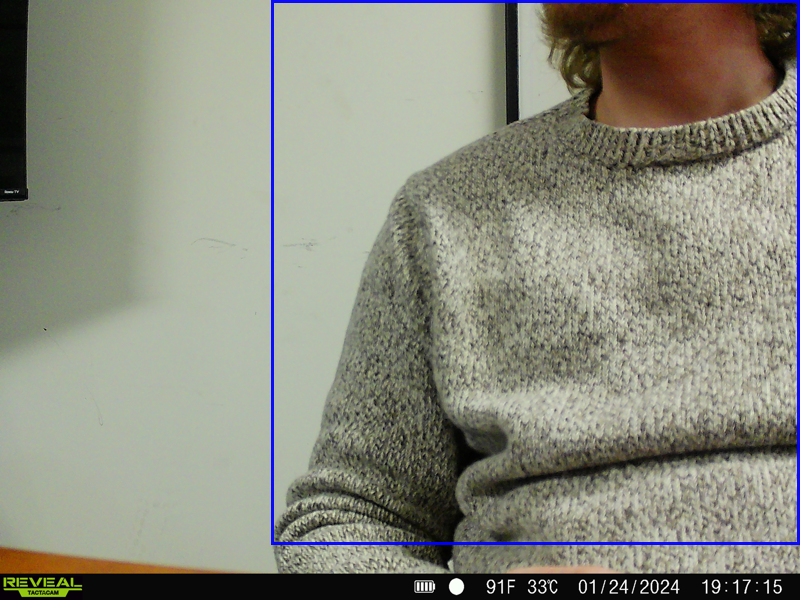

In [8]:
prediction_item = default_predictions_dict["predictions"][4]
img = load_rgb_image(prediction_item["filepath"])
detections = prediction_item["detections"]
img.thumbnail(size=(800, 800))
draw_bboxes(img, detections)

In [ ]:
# !python -m megadetector.visualization.visualize_detector_output images/default_predictions.json default_preview


This appears to be a SpeciesNet output file, converting to MD format
Writing temporary results to C:\Users\mores\AppData\Local\Temp\megadetector_temp_files\86b8b70d-328c-11f0-9a2a-acd5647db9b0.json
Detector output file contains 58 entries.
Rendering detections above a confidence threshold of 0.15


100%|██████████| 58/58 [00:24<00:00,  2.38it/s]

Skipped 0 failed images (of 58)
Skipped 0 missing images (of 58)
Skipped 0 below-threshold images (of 58)
Rendered detection results to default_preview


['default_preview\\anno_images~image_0.jpg',
 'default_preview\\anno_images~image_1.jpg',
 'default_preview\\anno_images~image_10.jpg',
 'default_preview\\anno_images~image_11.jpg',
 'default_preview\\anno_images~image_12.jpg',
 'default_preview\\anno_images~image_13.jpg',
 'default_preview\\anno_images~image_14.jpg',
 'default_preview\\anno_images~image_15.jpg',
 'default_preview\\anno_images~image_16.jpg',
 'default_preview\\anno_images~image_17.jpg',
 'default_preview\\anno_images~image_18.jpg',
 'default_preview\\anno_images~image_19.jpg',
 'default_preview\\anno_images~image_2.jpg',
 'default_preview\\anno_images~image_20.jpg',
 'default_preview\\anno_images~image_21.jpg',
 'default_preview\\anno_images~image_22.jpg',
 'default_preview\\anno_images~image_23.jpg',
 'default_preview\\anno_images~image_24.jpg',
 'default_preview\\anno_images~image_25.jpg',
 'default_preview\\anno_images~image_26.jpg',
 'default_preview\\anno_images~image_27.jpg',
 'default_preview\\anno_images~image_

In [11]:
!python -m megadetector.postprocessing.postprocess_batch_results images/default_predictions.json default_preview_fancy

Loading results from images/default_predictions.json
This appears to be a SpeciesNet output file, converting to MD format
Writing temporary results to C:\Users\mores\AppData\Local\Temp\megadetector_temp_files\97dd5d08-328c-11f0-bf53-acd5647db9b0.json
Converting results to dataframe
Finished loading MegaDetector results for 58 images from images/default_predictions.json
Choosing default confidence threshold of 0.2 based on MD version
Assigning images to rendering categories
Finished loading and preprocessing 58 rows from detector output, predicted 44 positives.
Rendered 58 images (of 58) in 21.85 seconds (0.38 seconds per image)
Generating classification category report
This appears to be a SpeciesNet output file, converting to MD format
Writing temporary results to C:\Users\mores\AppData\Local\Temp\megadetector_temp_files\a4edde89-328c-11f0-859c-acd5647db9b0.json
Finished writing html to default_preview_fancy\index.html



100%|██████████| 58/58 [00:00<00:00, 9829.87it/s]

100%|██████████| 58/58 [00:21<00:00,  2.65it/s]
